Simple ARIMA approach 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src import prepare_europe_data, prepare_empty_frame, plot_covid_data
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

In [2]:
data_path = '../../data/raw/time_series_covid19_confirmed_global.csv'
data_raw = pd.read_csv(data_path)

In [3]:
data_prepared_poland = prepare_europe_data(data=data_raw, start_date='4/1/20', end_date='4/29/20', country='Poland')

In [5]:
data_prepared_poland.shape

(1, 30)

In [6]:
plot_covid_data(data=data_prepared_poland, country='Poland')

In [86]:
df = data_prepared_poland
df = df.T
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.rename({'Poland': 'PolandConfirmedCases'}, axis=1)

In [8]:
df['CasesShifted'] = df['PolandConfirmedCases'].shift(1, axis=0)
df['DailyGrowthCases'] = df['PolandConfirmedCases']-df['CasesShifted']

In [9]:
daily_growth_series = df['DailyGrowthCases']
daily_growth_series = daily_growth_series.dropna()

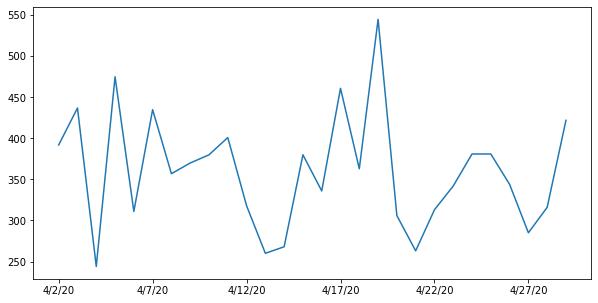

In [10]:
plt.figure(figsize=(10,5))
daily_growth_series.plot()

In [11]:
daily_growth_series = pd.to_numeric(daily_growth_series)

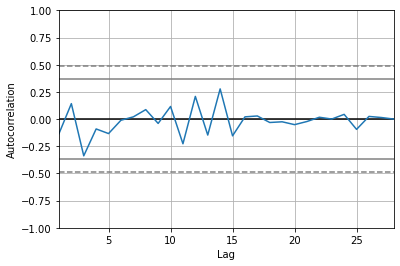

In [42]:
autocorrelation_plot(daily_growth_series)

In [49]:
X = daily_growth_series.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=269.677316, expected=342.000000
predicted=316.639173, expected=381.000000
predicted=352.435163, expected=381.000000
predicted=378.885954, expected=344.000000
predicted=364.186854, expected=285.000000
predicted=315.620893, expected=316.000000
predicted=289.432689, expected=422.000000


Test RMSE: 70.963


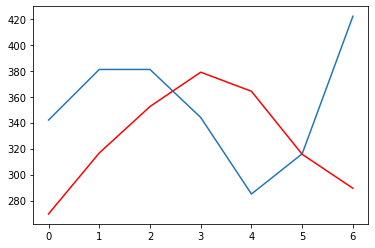

In [50]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [81]:
df_5_6_20 = prepare_empty_frame(start_date='4/30/20', end_date='5/6/20', country='Poland')

In [82]:
df_5_6_20

,Country/Region,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020
34,Poland,0,0,0,0,0,0,0


In [96]:
history = [x for x in daily_growth_series.values]
predictions = list()
week_growth = 0
for date in df_5_6_20.columns[1:]:
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    df_5_6_20[date] = yhat
    week_growth += yhat
    print('predictecd {}'.format(yhat))
    print('Week growth {}'.format(week_growth))

predictecd [354.57299846]
Week growth [354.57299846]
predictecd [394.70665619]
Week growth [749.27965465]
predictecd [368.05086547]
Week growth [1117.33052012]
predictecd [382.91177091]
Week growth [1500.24229103]
predictecd [371.93866383]
Week growth [1872.18095486]
predictecd [377.05582604]
Week growth [2249.2367809]
predictecd [372.14133849]
Week growth [2621.37811939]


In [97]:
df_5_6_20


,Country/Region,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020
34,Poland,354.572998,394.706656,368.050865,382.911771,371.938664,377.055826,372.141338


In [93]:
plot_covid_data(data=data_prepared_poland, country='Poland')

In [95]:
data_prepared_poland['4/29/20']

34    12640
Name: 4/29/20, dtype: int64

Predicted = 12640 + 2621 = 15261 ConfirmedCases

Predicted for 5/6/20 - 15261

Official for 5/6/20 - 14740

Error - 521 ConfirmedCases